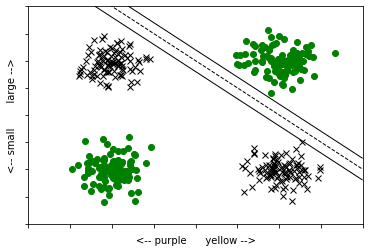

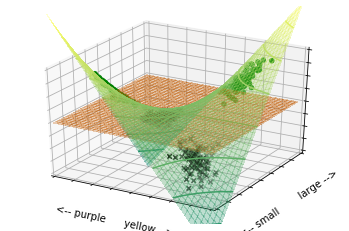

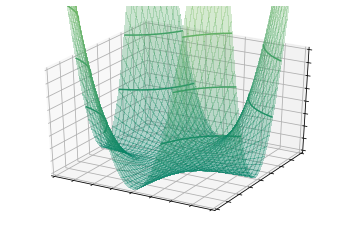

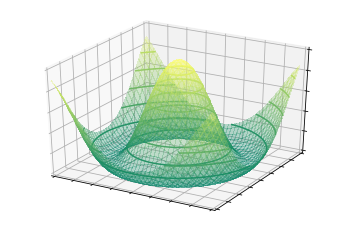

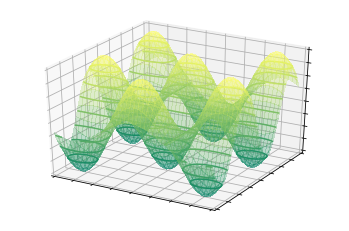

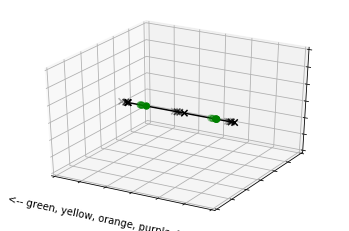

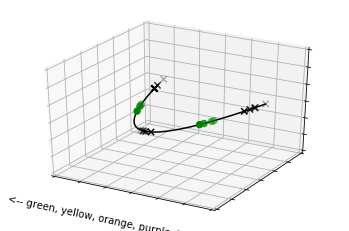

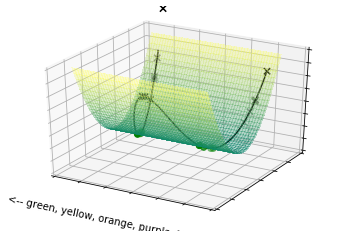

In [3]:
 
"" "
En el ejemplo 1, el objetivo es decidir si una fruta es buena para comer.
La fruta puede ser pequeña o grande, amarilla o morada.
Hay cuatro tipos de fruta.
1. Las frutas amarillas pequeñas son ciruelas verdes, no son buenas para comer.
2. Las pequeñas frutas moradas son ciruelas maduras, buenas para comer.
3. Las frutas amarillas grandes son duraznos maduros, buenos para comer.
4. Las frutas moradas grandes son duraznos podridos, no buenos para comer.
En el ejemplo 2, el objetivo es decidir si una fruta es buena para comer,
basado solo en el color.
La fruta puede ser verde, amarilla, naranja, morada y negra.
1. La fruta verde es un durazno verde, no es bueno para comer.
2. La fruta amarilla es un durazno maduro, bueno para comer.
3. La fruta de naranja es una ciruela verde, no es buena para comer.
4. La fruta morada es una ciruela madura, buena para comer.
5. La fruta negra es un durazno podrido, no es bueno para comer.
"" " 


import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate example 1 data. 
n_points = 100
scale = .2
loc = 1.
x_large_yellow = np.random.normal(loc=loc, scale=scale, size=n_points) 
y_large_yellow = np.random.normal(loc=loc, scale=scale, size=n_points) 
x_small_yellow = np.random.normal(loc=loc, scale=scale, size=n_points) 
y_small_yellow = np.random.normal(loc=-loc, scale=scale, size=n_points) 
x_large_purple = np.random.normal(loc=-loc, scale=scale, size=n_points) 
y_large_purple = np.random.normal(loc=loc, scale=scale, size=n_points) 
x_small_purple = np.random.normal(loc=-loc, scale=scale, size=n_points) 
y_small_purple = np.random.normal(loc=-loc, scale=scale, size=n_points) 

# Show example 1.
fig = plt.figure(1)
ax = fig.add_subplot(111)
plt.plot(x_large_yellow, y_large_yellow, c='green', marker='o', linestyle='None')
plt.plot(x_small_purple, y_small_purple, c='green', marker='o', linestyle='None')
plt.plot(x_large_purple, y_large_purple, c='black', marker='x', linestyle='None')
plt.plot(x_small_yellow, y_small_yellow, c='black', marker='x', linestyle='None')
ax.set_xlabel('<-- purple      yellow -->')
ax.set_ylabel('<-- small        large -->')
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.axis([-2., 2., -2., 2.])

# Plot a poor discriminator for example 1.
x = np.arange(-2., 2., .01)
margin = .2
plt.plot(
    x, 1 - x,
    color='black',
    linestyle='dashed',
    linewidth=1.,
)
plt.plot(
    x, 1 - x + margin,
    color='black',
    linewidth=1.,
)
plt.plot(
    x, 1 - x - margin,
    color='black',
    linewidth=1.,
)

fig = plt.figure(3)
ax = fig.add_subplot(111, projection='3d')

# Plot example 1 on a hyperbolic surface.
x = np.arange(-2, 2, 0.05)
y = np.arange(-2, 2, 0.05)
x, y = np.meshgrid(x, y)
hyp = x * y
zmin = -2.
zmax = 2.
ax.plot_surface(
    x, y, hyp,
    cmap=cm.summer,
    alpha=.3,
    linewidth=0,
    antialiased=False,
)
ax.contour(
    x, y, hyp,
    cmap=cm.summer,
)
ax.set_xlabel('<-- purple      yellow -->')
ax.set_ylabel('<-- small        large -->')
ax.set_zticklabels([])
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.axis([-2., 2., -2., 2.])
ax.set_zlim([zmin, zmax])

z_large_yellow = x_large_yellow * y_large_yellow
z_small_yellow = x_small_yellow * y_small_yellow
z_large_purple = x_large_purple * y_large_purple
z_small_purple = x_small_purple * y_small_purple

ax.scatter(x_large_yellow, y_large_yellow, z_large_yellow, c='green', marker='o')
ax.scatter(x_small_purple, y_small_purple, z_small_purple, c='green', marker='o')
ax.scatter(x_large_purple, y_large_purple, z_large_purple, c='black', marker='x')
ax.scatter(x_small_yellow, y_small_yellow, z_small_yellow, c='black', marker='x')

# Plot a good planar discriminator.
plane = 0. * x
ax.plot_surface(
    x, y, plane,
    alpha=.3,
    linewidth=0,
    antialiased=False,
)

# Plot other surfaces that can be used for transformations.

# A quadratic surface.
fig = plt.figure(4)
ax = fig.add_subplot(111, projection='3d')

quadratic = x**2 * y**2
ax.plot_surface(
    x, y, quadratic,
    cmap=cm.summer,
    alpha=.3,
    linewidth=0,
    antialiased=False,
)
ax.contour(x, y, quadratic, cmap=cm.summer)
ax.set_zticklabels([])
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.axis([-2., 2., -2., 2.])
ax.set_zlim([0, 4.])

fig = plt.figure(5)
ax = fig.add_subplot(111, projection='3d')

# A rippled surface.
ripple = np.cos((x**2 + y**2)**.5)**2
ax.plot_surface(
    x, y, ripple,
    cmap=cm.summer,
    alpha=.3,
    linewidth=0,
    antialiased=False,
)
ax.contour(x, y, ripple, cmap=cm.summer)
ax.set_zticklabels([])
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.axis([-2., 2., -2., 2.])
ax.set_zlim([0., 1.])

# A peaked surface.
fig = plt.figure(6)
ax = fig.add_subplot(111, projection='3d')
peaked = np.cos(2 * x) * np.sin(3 * y)
ax.plot_surface(
    x, y, peaked,
    cmap=cm.summer,
    alpha=.3,
    linewidth=0,
    antialiased=False,
)
ax.contour(x, y, peaked, cmap=cm.summer)
ax.set_zticklabels([])
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.axis([-2., 2., -2., 2.])
ax.set_zlim([-1., 1.])

# Example 2.
# Illustrate higher dimensional transformations.
# Generate the data. 
n_points = 5
scale = .1
x_green = np.random.normal(loc=-2., scale=scale, size=n_points) 
y_green = np.zeros(n_points)
z_green = np.zeros(n_points)
x_yellow = np.random.normal(loc=-1.4, scale=scale, size=n_points) 
y_yellow = np.zeros(n_points)
z_yellow = np.zeros(n_points)
x_orange = np.random.normal(loc=0., scale=scale, size=n_points) 
y_orange = np.zeros(n_points)
z_orange = np.zeros(n_points)
x_purple = np.random.normal(loc=1.4, scale=scale, size=n_points) 
y_purple = np.zeros(n_points)
z_purple = np.zeros(n_points)
x_black = np.random.normal(loc=2., scale=scale, size=n_points) 
y_black = np.zeros(n_points)
z_black = np.zeros(n_points)

# Show five types of fruit on a line,
# based on whether or not it is good to eat.
fig = plt.figure(7)
ax = fig.add_subplot(111, projection='3d')
x_line = np.arange(-2.1, 2.1, .01)
y_line = np.zeros(x_line.size)
z_line = np.zeros(x_line.size)
ax.plot(x_line, y_line, zs=z_line, color='black')
markersize = 40.
ax.scatter(
    x_green, y_green, zs=z_green,
    c='black',
    marker='x',
    s=markersize,
)
ax.scatter(
    x_yellow, y_yellow, zs=z_yellow,
    c='green',
    marker='o',
    s=markersize,
)
ax.scatter(
    x_orange, y_orange, zs=z_orange,
    c='black',
    marker='x',
    s=markersize,
)
ax.scatter(
    x_purple, y_purple, zs=z_purple,
    c='green',
    marker='o',
    s=markersize,
)
ax.scatter(
    x_black, y_black, zs=z_black,
    c='black',
    marker='x',
    s=markersize,
)

ax.set_xlabel('<-- green, yellow, orange, purple, black -->')
ax.set_zticklabels([])
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.axis([-3., 3., -3., 3.])
ax.set_zlim([-3., 3.])

# Transform the data to two dimensions.
shift = 2.2
y_green = x_green**2  - shift
y_yellow = x_yellow**2 - shift
y_orange = x_orange**2 - shift
y_purple = x_purple**2 - shift
y_black = x_black**2 - shift
fig = plt.figure(8)
ax = fig.add_subplot(111, projection='3d')
y_line = x_line**2 - shift
ax.plot(x_line, y_line, zs=z_line, color='black')
ax.scatter(
    x_green, y_green, zs=z_green,
    c='black',
    marker='x',
    s=markersize,
)
ax.scatter(
    x_yellow, y_yellow, zs=z_yellow,
    c='green',
    marker='o',
    s=markersize,
)
ax.scatter(
    x_orange, y_orange, zs=z_orange,
    c='black',
    marker='x',
    s=markersize,
)
ax.scatter(
    x_purple, y_purple, zs=z_purple,
    c='green',
    marker='o',
    s=markersize,
)
ax.scatter(
    x_black, y_black, zs=z_black,
    c='black',
    marker='x',
    s=markersize,
)

ax.set_xlabel('<-- green, yellow, orange, purple, black -->')
ax.set_zticklabels([])
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.axis([-3., 3., -3., 3.])
ax.set_zlim([-3., 3.])

# Transform the data to three dimensions.
z_green = y_green**2  - shift
z_yellow = y_yellow**2 - shift
z_orange = y_orange**2 - shift
z_purple = y_purple**2 - shift
z_black = y_black**2 - shift
fig = plt.figure(9)
ax = fig.add_subplot(111, projection='3d')
z_line = y_line**2 - shift
ax.plot(x_line, y_line, zs=z_line, color='black')
ax.scatter(
    x_green, y_green, zs=z_green,
    c='black',
    marker='x',
    s=markersize,
)
ax.scatter(
    x_yellow, y_yellow, zs=z_yellow,
    c='green',
    marker='o',
    s=markersize,
)
ax.scatter(
    x_orange, y_orange, zs=z_orange,
    c='black',
    marker='x',
    s=markersize,
)
ax.scatter(
    x_purple, y_purple, zs=z_purple,
    c='green',
    marker='o',
    s=markersize,
)
ax.scatter(
    x_black, y_black, zs=z_black,
    c='black',
    marker='x',
    s=markersize,
)

# Optionally, show the resulting quadratic surface.
show_surface = True
if show_surface:
    x = np.arange(-2.5, 2.5, 0.05)
    y = np.arange(-2.5, 2.5, 0.05)
    x, y = np.meshgrid(x, y)
    dual_quad = y**2 - shift
    ax.plot_surface(
        x, y, dual_quad,
        cmap=cm.summer,
        alpha=.3,
        linewidth=0,
        antialiased=False,
    )

# Optionally, show a good planar discriminator.
show_discriminator = False
if show_discriminator:
    plane = 0. * x
    ax.plot_surface(
        x, y, plane,
        alpha=.3,
        linewidth=0,
        antialiased=False,
    )

ax.set_xlabel('<-- green, yellow, orange, purple, black -->')
ax.set_zticklabels([])
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.axis([-3., 3., -3., 3.])
ax.set_zlim([-4., 4.])

plt.show()